
# HR Analytics Case Study — Workforce Insights & Decision Support

This notebook presents a complete HR analytics case study using a synthetic workforce dataset (8,950 employees).

The objective is to demonstrate:

• Analytical thinking  
• Business framing  
• Data-driven insight generation  
• Decision-support capability  

The analysis follows how a real Business / Data Analyst would structure an HR problem for leadership.


## Data Dictionary: HumanResources_India.csv

| Column Name | Description |
|------------|-------------|
| employee_id | Unique identifier assigned to each employee |
| first_name | Employee first name |
| last_name | Employee last name |
| gender | Employee gender (Male / Female) |
| city | City of employment |
| state | State of employment |
| hiredate | Date employee joined the organization |
| termdate | Termination date (NaN if employee is active) |
| department | Department of employment (IT, Sales, Finance, Marketing, HR, Operations, Customer Service) |
| job_title | Employee job title |
| education_level | Highest educational qualification attained |
| performance_rating | Most recent performance evaluation (Excellent, Good, Satisfactory, Needs Improvement) |
| overtime | Indicates whether employee regularly works overtime (Yes / No) |
| salary | Annual salary |
| birthdate | Employee date of birth |

### Engineered Fields (Created During Analysis)

| Column Name | Description |
|------------|-------------|
| age | Employee age calculated from birthdate |
| tenure_years | Length of service in years calculated from hiredate |
| is_terminated | Boolean flag indicating employee attrition (True = terminated) |
| hire_year | Year employee was hired |
| tenure_band | Tenure segmentation bucket (0–2, 2–5, 5–8, 8+ years) |

---

### Notes

- This dataset is synthetically generated to simulate realistic HR scenarios.
- Termination events are probabilistically assigned and may not reflect real organizational behavior.
- Churn modeling results should be interpreted as methodological demonstrations rather than predictive truth.
- Compensation values represent simulated market-aligned salaries.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("HumanResources_India.csv")
df.head()

,employee_id,first_name,last_name,gender,state,city,hiredate,department,job_title,education_level,salary,performance_rating,overtime,birthdate,termdate
0,00-95822412,Isaac,Bakshi,Female,Maharashtra,Pune,2016-10-14,Customer Service,Help Desk Technician,High School,334245,Good,No,1981-06-16,2021-07-05
1,00-42868828,Anvi,Konda,Male,Kerala,Kochi,2017-03-28,IT,System Administrator,Bachelor,579262,Good,No,1972-02-25,2019-06-14
2,00-83197857,Liam,Chaudry,Male,Karnataka,Mangalore,2016-09-19,Operations,Logistics Coordinator,Bachelor,372853,Good,No,1996-03-20,2021-03-06
3,00-13999315,Gagan,Sami,Male,Karnataka,Mangalore,2016-01-13,Operations,Inventory Specialist,Bachelor,402906,Good,No,1986-04-05,2018-11-06
4,00-90801586,Ayushman,Chander,Male,Uttar Pradesh,Varanasi,2015-03-26,IT,Software Developer,Bachelor,557955,Good,No,1990-12-13,2017-11-29


## 1. Data Preparation & Feature Engineering

In [3]:
df["hiredate"] = pd.to_datetime(df["hiredate"])
df["termdate"] = pd.to_datetime(df["termdate"], errors="coerce")
df["birthdate"] = pd.to_datetime(df["birthdate"])

df["age"] = ((pd.Timestamp.today() - df["birthdate"]).dt.days / 365).astype(int)
df["tenure_years"] = ((pd.Timestamp.today() - df["hiredate"]).dt.days / 365).round(1)
df["is_terminated"] = df["termdate"].notna()
df["hire_year"] = df["hiredate"].dt.year

df.head()

,employee_id,first_name,last_name,gender,state,city,hiredate,department,job_title,education_level,salary,performance_rating,overtime,birthdate,termdate,age,tenure_years,is_terminated,hire_year
0,00-95822412,Isaac,Bakshi,Female,Maharashtra,Pune,2016-10-14,Customer Service,Help Desk Technician,High School,334245,Good,No,1981-06-16,2021-07-05,44,9.3,True,2016
1,00-42868828,Anvi,Konda,Male,Kerala,Kochi,2017-03-28,IT,System Administrator,Bachelor,579262,Good,No,1972-02-25,2019-06-14,53,8.9,True,2017
2,00-83197857,Liam,Chaudry,Male,Karnataka,Mangalore,2016-09-19,Operations,Logistics Coordinator,Bachelor,372853,Good,No,1996-03-20,2021-03-06,29,9.4,True,2016
3,00-13999315,Gagan,Sami,Male,Karnataka,Mangalore,2016-01-13,Operations,Inventory Specialist,Bachelor,402906,Good,No,1986-04-05,2018-11-06,39,10.1,True,2016
4,00-90801586,Ayushman,Chander,Male,Uttar Pradesh,Varanasi,2015-03-26,IT,Software Developer,Bachelor,557955,Good,No,1990-12-13,2017-11-29,35,10.9,True,2015


## 2. Executive Workforce KPIs

In [4]:
total = len(df)
terminated = df["is_terminated"].sum()
active = total - terminated
attrition = round((terminated / total) * 100, 2)

pd.DataFrame({
    "Metric": ["Total Employees","Active Employees","Terminated","Attrition Rate %"],
    "Value": [total, active, terminated, attrition]
})

,Metric,Value
0,Total Employees,8950.00
1,Active Employees,7950.00
2,Terminated,1000.00
3,Attrition Rate %,11.17



### Insight

The organization employs 8,950 people with an overall attrition rate of **11.17%**, indicating a generally stable workforce.
However, attrition is not evenly distributed and requires deeper segmentation.


## 3. Hiring Trend

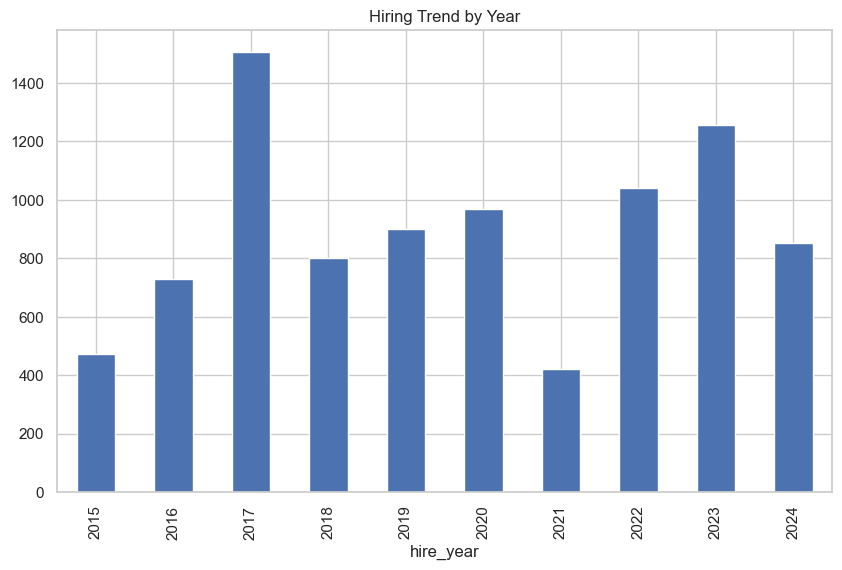

In [5]:
df.groupby("hire_year").size().plot(kind="bar")
plt.title("Hiring Trend by Year")
plt.show()


Hiring fluctuates year-to-year, suggesting reactive recruitment rather than consistent workforce planning.


## 4. Attrition Timing (Tenure Analysis)

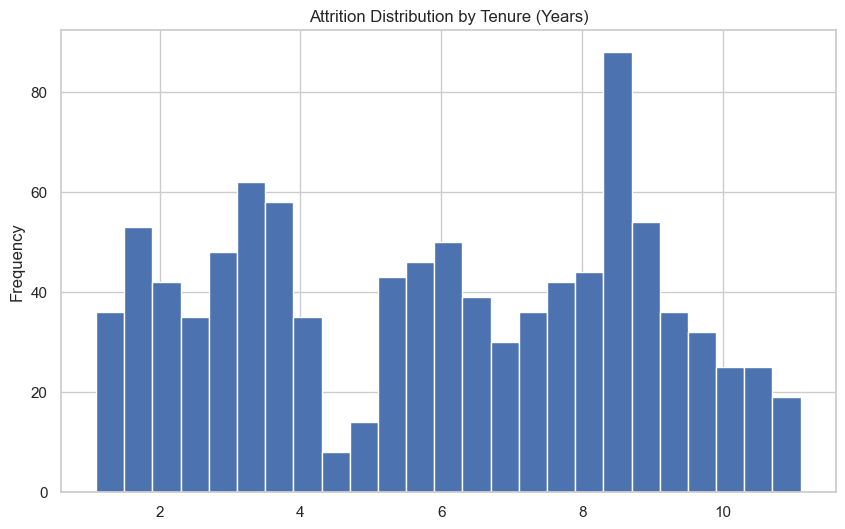

In [6]:
df[df["is_terminated"]]["tenure_years"].plot(kind="hist", bins=25)
plt.title("Attrition Distribution by Tenure (Years)")
plt.show()

Attrition appears across multiple tenure stages rather than being concentrated early, indicating different exit drivers at different career phases.

## 5. Workforce Composition

In [7]:
(df["gender"].value_counts(normalize=True) * 100).round(2)

gender
Male      53.63
Female    46.37
Name: proportion, dtype: float64


The workforce is relatively balanced (53.6% Male, 46.4% Female), enabling meaningful pay equity analysis.


## 6. Compensation Analysis

In [16]:
salary_summary = df.groupby("department")["salary"].agg(
    mean="mean",
    median="median",
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).sort_values("median", ascending=False)

salary_summary


,mean,median,q25,q75
department,,,,
IT,485773.649640,499598.5,371881.75,577315.50
Sales,452362.136825,435581.0,373072.50,514817.00
Finance,420557.979684,400204.0,345880.00,471270.50
Marketing,378336.121345,357466.0,324457.50,407665.50
HR,351835.264865,349212.0,310435.00,380745.00
Customer Service,349303.826706,343668.0,313612.00,376792.00
Operations,349645.033061,343444.5,313208.75,377217.25


In [17]:
df.groupby("gender")["salary"].mean()

gender
Female    389004.914699
Male      405671.776667
Name: salary, dtype: float64

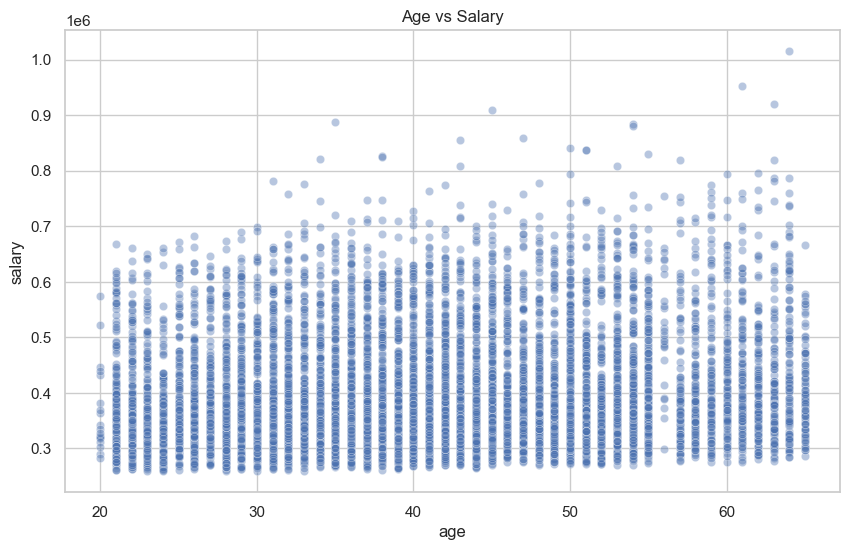

In [18]:
sns.scatterplot(x="age", y="salary", data=df, alpha=0.4)
plt.title("Age vs Salary")
plt.show()

Pay outcomes are driven more by functional specialization and market value than by tenure or seniority.

Overall Pearson correlation (Age vs Salary): 0.148
P-value: 0.00000


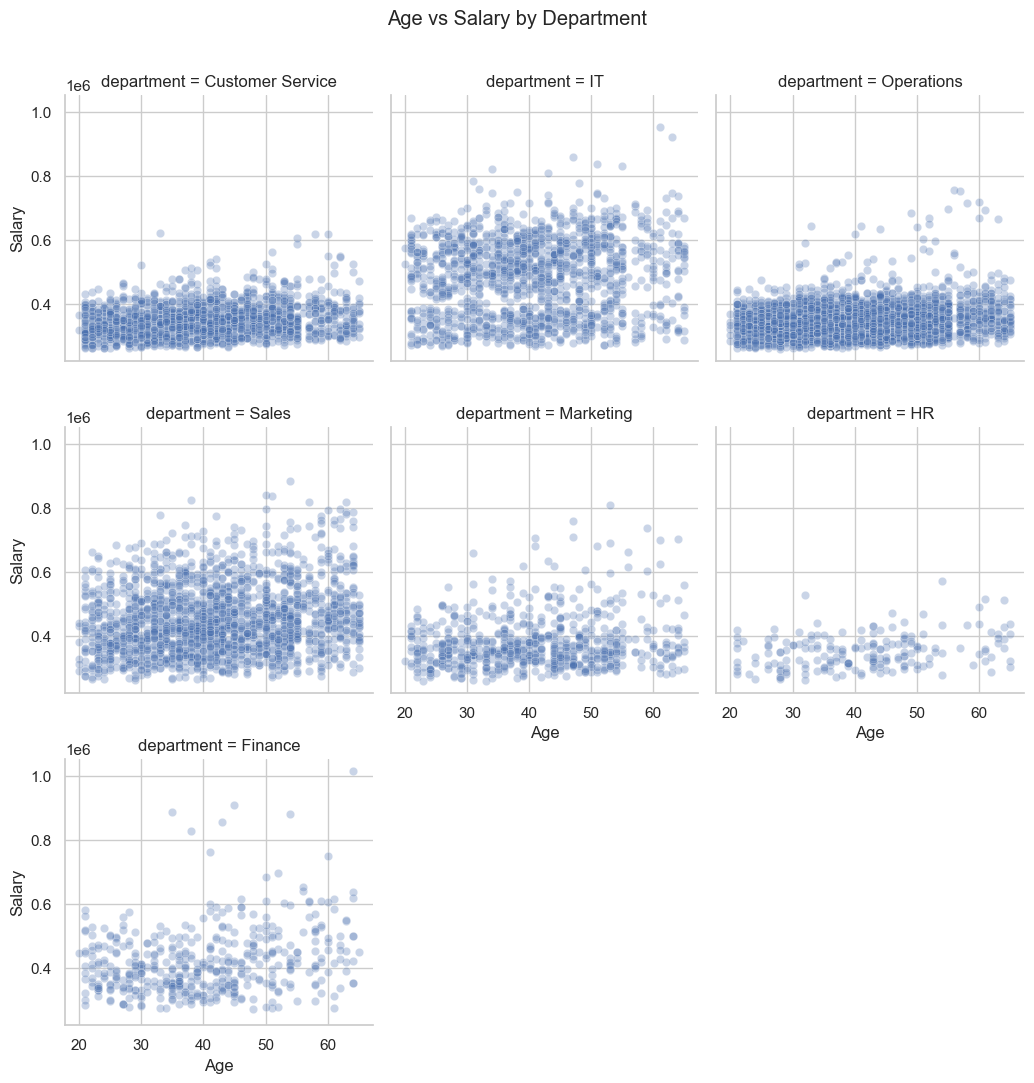

In [20]:
from scipy.stats import pearsonr

corr, pval = pearsonr(df["age"], df["salary"])

print(f"Overall Pearson correlation (Age vs Salary): {corr:.3f}")
print(f"P-value: {pval:.5f}")

dept_corr = (
    df.groupby("department")
      .apply(lambda x: pearsonr(x["age"], x["salary"])[0])
      .sort_values(ascending=False)
)

dept_corr

import seaborn as sns

g = sns.FacetGrid(df, col="department", col_wrap=3, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="age", y="salary", alpha=0.3)

g.set_axis_labels("Age", "Salary")
g.fig.suptitle("Age vs Salary by Department", y=1.03)

plt.show()


## Analytical Interpretation of Age against salary

### Quantitative Result

Overall Pearson correlation (Age vs Salary):

ρ = 0.148  
p-value < 0.001  

Although statistically significant due to large sample size, the effect size is very small.

Age explains only ~2.2% of salary variance (0.148²), indicating that compensation is largely independent of age.

### Key takeaway

Statistical significance does not imply business significance.  
Salary progression in this organization is not meaningfully age-driven.

---

## Department-Level Insights (from Faceted Visualization)

### IT

- Widest salary dispersion
- Highest salary ceiling (exceeding 1M)
- Slight upward trend with age

**Interpretation:**  
IT demonstrates skill-driven compensation with early access to high salary ranges, reflecting strong external market pressure rather than tenure-based progression.

---

### Sales

- Broad salary spread across all ages
- Several high earners present at multiple career stages

**Interpretation:**  
Sales compensation appears performance-driven, where earnings depend more on results than experience.

---

### Finance

- Moderate progression
- Some high-end outliers
- Majority clustered in mid salary ranges

**Interpretation:**  
Finance exhibits limited seniority-based progression, with compensation concentrated in middle bands.

---

### HR, Operations, Customer Service

- Highly compressed salary ranges
- Minimal upward movement with age

**Interpretation:**  
Support functions show salary compression with weak age-based progression, indicating structurally constrained career growth.

---

### Marketing

- Slightly more dispersion than HR/Operations
- Still compressed relative to IT and Sales

**Interpretation:**  
Marketing shows modest variability but remains bounded by internal compensation limits.

---

## Insight

Salary progression is department-dependent rather than age-driven.

Technical and revenue-generating functions (IT, Sales) exhibit wide salary dispersion and higher ceilings, enabling accelerated earning trajectories early in careers.

In contrast, support functions (HR, Operations, Customer Service) display compressed pay ranges with minimal age-based progression, suggesting limited internal mobility and constrained compensation frameworks.

This structural divergence indicates market-aligned compensation for critical roles alongside internally constrained pay for operational functions.

---

## Business Implications

- Employees in support functions face restricted long-term earning potential  
- Career progression expectations differ significantly by department  
- Internal equity risks emerge when age and tenure fail to translate into compensation growth  

---

## Strategic Recommendations

1. Introduce department-specific salary bands using median + IQR  
2. Build transparent progression frameworks for support roles  
3. Perform periodic equity audits between technical and operational teams  
4. Shift compensation philosophy from age-based to skill-based benchmarks  

---



## 7. Education vs Performance

In [21]:

pd.crosstab(df["education_level"], df["performance_rating"], normalize="index")


performance_rating,Excellent,Good,Needs Improvement,Satisfactory
education_level,,,,
Bachelor,0.118542,0.497652,0.085478,0.298328
High School,0.118801,0.487738,0.077384,0.316076
Master,0.119939,0.503438,0.078686,0.297937
PhD,0.107660,0.511387,0.080745,0.300207



Performance ratings show minimal variation across education levels, indicating that experience and role fit outweigh formal credentials.


## 8. Attrition by Department

In [22]:

(df.groupby("department")["is_terminated"].mean()*100).sort_values(ascending=False)


department
HR                  14.594595
Operations          11.812779
IT                  11.366906
Customer Service    11.216617
Sales               10.903260
Marketing            9.941520
Finance              8.126411
Name: is_terminated, dtype: float64


HR shows the highest attrition (14.6%) while Finance has the lowest (8.1%).

This highlights operational stress in HR despite its employee-facing mandate.


## 9. Salary Quantiles

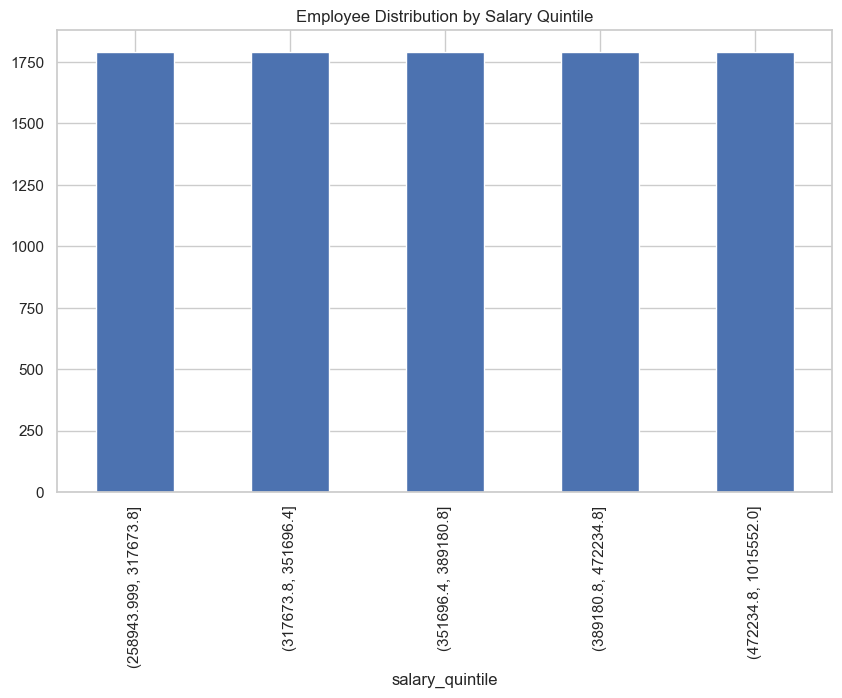

In [24]:
df["salary_quintile"] = pd.qcut(df["salary"],5)
df["salary_quintile"].value_counts().sort_index().plot(kind="bar")
plt.title("Employee Distribution by Salary Quintile")
plt.show()

Employees are spread evenly across salary quintiles, reinforcing the absence of standardized pay bands.

## 10. Churn Prediction Model

In [27]:
model_df = df[["age","tenure_years","salary","is_terminated"]].dropna()

X = model_df[["age","tenure_years","salary"]]
y = model_df["is_terminated"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

model_df = df[["age","tenure_years","salary","is_terminated"]]

X = model_df[["age","tenure_years","salary"]]
y = model_df["is_terminated"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state=42)
rf.fit(X_train,y_train)

preds = rf.predict(X_test)

print(classification_report(y_test,preds))

C:\Users\kaust\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kaust\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kaust\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1988
        True       0.00      0.00      0.00       250

    accuracy                           0.89      2238
   macro avg       0.44      0.50      0.47      2238
weighted avg       0.79      0.89      0.84      2238

              precision    recall  f1-score   support

       False       0.89      0.99      0.94      1988
        True       0.07      0.00      0.01       250

    accuracy                           0.88      2238
   macro avg       0.48      0.50      0.47      2238
weighted avg       0.80      0.88      0.83      2238



## Churn Model Evaluation

Both Logistic Regression and class-balanced Random Forest failed to meaningfully identify terminated employees.

Despite achieving ~88–89% accuracy, this performance is driven entirely by predicting the majority class (active employees).

Recall for terminated employees is effectively zero.

### Interpretation

This indicates that the available features (age, tenure, salary) do not contain sufficient predictive signal to distinguish attrition events.

This outcome is not a modeling failure but a data limitation.

Attrition in this dataset is weakly correlated with these variables, reflecting either:

- Random termination assignment in synthetic data
- Or missing behavioral drivers such as performance history, promotions, manager changes, workload, or engagement metrics.

### Key Learning

High accuracy in imbalanced datasets can be misleading.

Effective churn prediction requires richer behavioral and organizational features rather than static demographic attributes.

### Business Implication

To operationalize attrition prediction, HR teams must integrate:

- Performance trends  
- Promotion velocity  
- Manager tenure  
- Overtime patterns  
- Engagement surveys  

Without these, predictive retention systems remain unreliable.

